In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 10, 6

In [6]:
df = pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
df["Month"]  = pd.to_datetime(df["Month"], infer_datetime_format=True)
indexeddf = df.set_index(["Month"])

In [11]:
df.shape

(144, 2)

In [12]:
from datetime import datetime
indexeddf

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


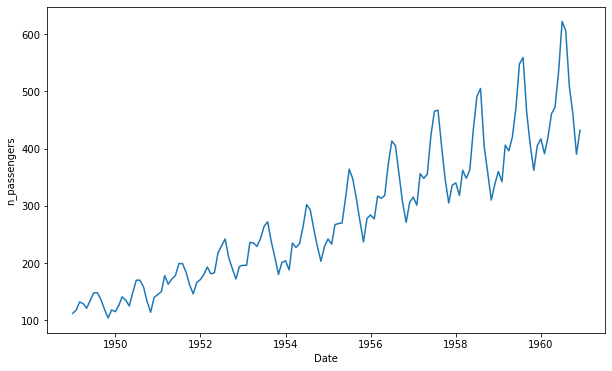

In [13]:
plt.xlabel("Date")
plt.ylabel("n_passengers")
plt.plot(indexeddf)

In [14]:
rolmean = indexeddf.rolling(window=12).mean()
rolstd = indexeddf.rolling(window=12).std()
rolmean, rolstd

(            #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 ...                 ...
 1960-08-01   463.333333
 1960-09-01   467.083333
 1960-10-01   471.583333
 1960-11-01   473.916667
 1960-12-01   476.166667
 
 [144 rows x 1 columns],
             #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 ...                 ...
 1960-08-01    83.630500
 1960-09-01    84.617276
 1960-10-01    82.541954
 1960-11-01    79.502382
 1960-12-01    77.737125
 
 [144 rows x 1 columns])

<function matplotlib.pyplot.show(close=None, block=None)>

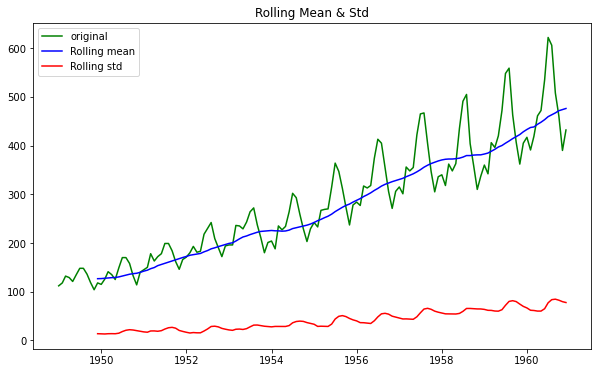

In [15]:
original=  plt.plot(indexeddf, color="green",  label= "original")
mean = plt.plot(rolmean, color="b", label="Rolling mean")
std = plt.plot(rolstd, color="r", label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling Mean & Std")
plt.show

In [238]:
#Using ADCF to test null hypotesis 'Data is not stationary'
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-Fuller Test: ")
ADCFtest = adfuller(indexeddf["#Passengers"], autolag = "AIC")

ADCFoutput = pd.Series(ADCFtest[0:4], index = ["Test Statistic","p-value","#_Lags","Observations Used"])
for key, value in ADCFtest[4].items():
    ADCFoutput["Critical Value (%s)"%key] = value

ADCFoutput

Result of Dickey-Fuller Test: 


Test Statistic            0.815369
p-value                   0.991880
#_Lags                   13.000000
Observations Used       130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64

In [16]:
# Estimate Trend - take a log of the values - We still see upward trend
indexeddf_logScale = np.log(indexeddf)
#plt.plot(indexeddf_logScale)
indexeddf_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


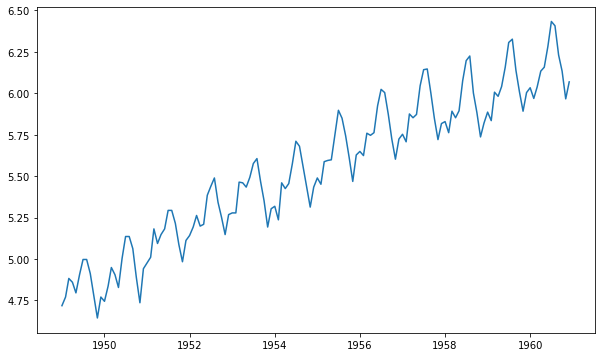

In [17]:
# Estimate Trend - take a log of the values - We still see upward trend
indexeddf_logScale = np.log(indexeddf)
plt.plot(indexeddf_logScale)
#indexeddf_logScale

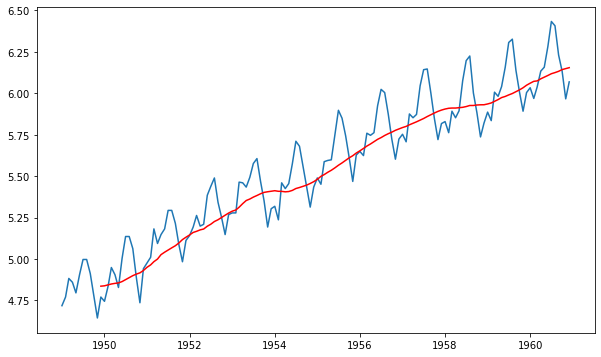

In [18]:
# Taking the moving average to subtract from original
mvavg = indexeddf_logScale.rolling(window=12).mean()
mvstd = indexeddf_logScale.rolling(window=12).std()
plt.plot(indexeddf_logScale)
plt.plot(mvavg, color="r")

In [19]:
df_logScale_minus_mvavg = indexeddf_logScale - mvavg
df_logScale_minus_mvavg.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [20]:
#Dropping NaN values
df_logScale_minus_mvavg.dropna(inplace=True)
df_logScale_minus_mvavg.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [21]:
#Using ADCF to test of Time series 'If stationary'
def if_Data_stationary (timeseries):
#Find rolling Statistics
    mvavgg = timeseries.rolling(window=12).mean()
    mvsttd = timeseries.rolling(window=12).std()

#Plot Statistics
    original=  plt.plot(timeseries, color="green",  label= "original")
    mean = plt.plot(mvavgg, color="b", label="Rolling mean")
    std = plt.plot(mvsttd, color="orange", label="Rolling std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Std of Transformed Data")
    plt.show(block=False)

#perform Dickey-Fuller test on the timeseries data: Testing if stationary after transformation
    print("Result of Dickey-Fuller Test: ")
    fullertest = adfuller(timeseries["#Passengers"], autolag="AIC")
    fulleroutput = pd.Series(fullertest[0:4], index = ["Test Statistic","p-value","#_Lags","Observations Used"])
    for key, value in fullertest[4].items():
        fulleroutput["Critical Value (%s)"%key] = value

    print(fulleroutput)

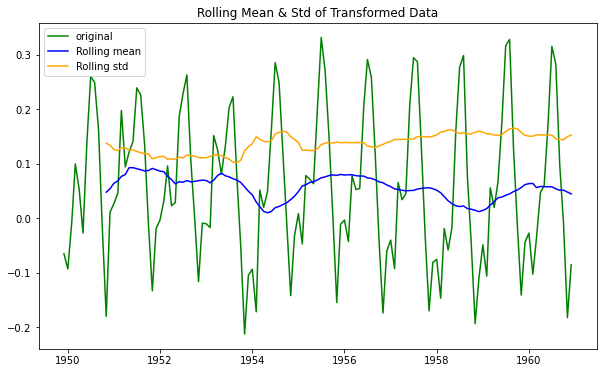

Result of Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
#_Lags                   13.000000
Observations Used       119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [245]:
if_Data_stationary(df_logScale_minus_mvavg)

In [22]:
df_logScale_minus_mvavg

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


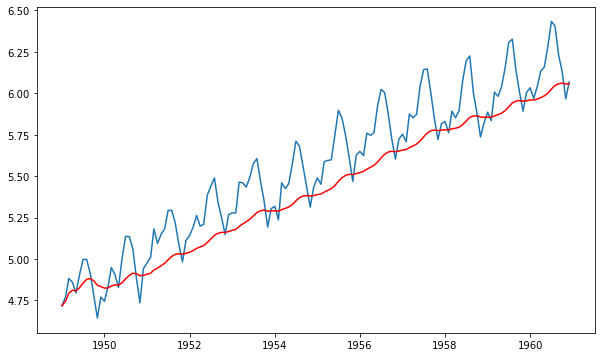

In [23]:
#Taking Weighted average to subtract from log_scale data
expdecay_weighted_df = indexeddf_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexeddf_logScale)
plt.plot(expdecay_weighted_df, color="r")

#to check the trend in the timeseries


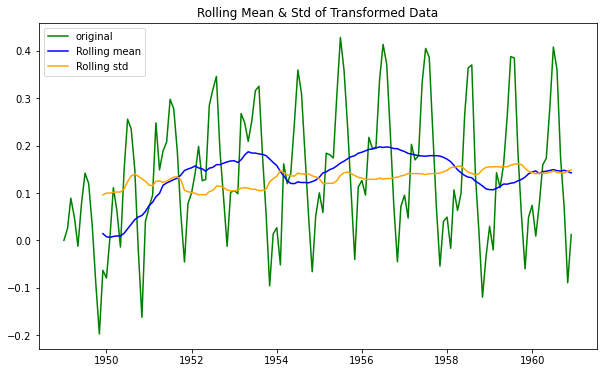

Result of Dickey-Fuller Test: 


NameError: name 'adfuller' is not defined

In [25]:
dflogscale_minus_expdecay_weighted_df = indexeddf_logScale - expdecay_weighted_df
if_Data_stationary(dflogscale_minus_expdecay_weighted_df)
plt.plot(dflogscale_minus_expdecay_weighted_df, color="black")

In [24]:
dflogscale_minus_expdecay_weighted_df

NameError: name 'dflogscale_minus_expdecay_weighted_df' is not defined

In [2]:
indexeddf_logScale

NameError: name 'indexeddf_logScale' is not defined

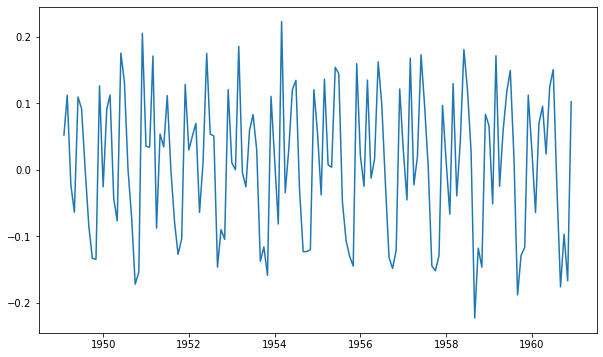

In [250]:
#shifting means on the log scale dataset
shiftingmeans_indexed_log = indexeddf_logScale - indexeddf_logScale.shift()
plt.plot(shiftingmeans_indexed_log)

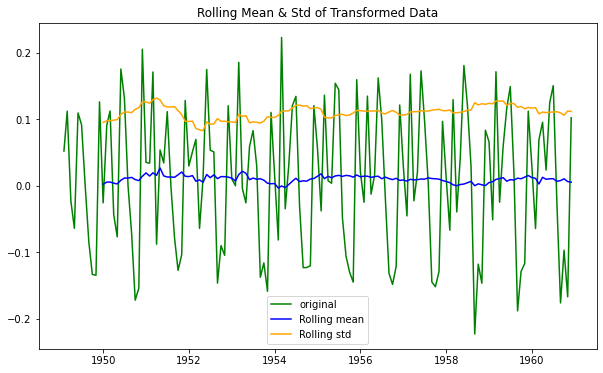

Result of Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
#_Lags                   14.000000
Observations Used       128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [251]:
cleanedshifteddf = shiftingmeans_indexed_log.dropna(inplace=False)
if_Data_stationary(cleanedshifteddf)

In [3]:
indexeddf_logScale

NameError: name 'indexeddf_logScale' is not defined

In [2]:
from unicodedata import decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(index)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.plot(411)
plt.plot(indexeddf_logScale, label="original")
plt.legend(loc="best")
plt.title("Decomposition of Logged Data original")
plt.subplot(412)
plt.plot(trend, label="trend")
plt.legend(loc="best")
plt.title("Decomposition of Logged Data trend")
plt.subplot(413)
plt.plot(seasonal, label="seasonal")
plt.legend(loc="best")
plt.title("Decomposition of Logged Data seasonal")
plt.subplot(414)
plt.plot(residual, label="residual")
plt.legend(loc="best")
plt.title("Decomposition of Logged Data - residual")
plt.tight_layout()


decomposedLoggedData = residual
plcholder = decomposedLoggedData.dropna(inplace=True)
#plcholder = decomposedLoggedData.fillna(0)
if_Data_stationary(plcholder)

NameError: name 'indexeddf_logScale' is not defined

In [256]:
residual['Month'] = residual['Month']
residual['#Passengers'] = residual['#Passengers']

KeyError: 'Month'

In [253]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(shiftingmeans_indexed_log, nlags=20)
lag_pacf = pacf(shiftingmeans_indexed_log, nlags=20, method="ols")

#plotting ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='_ _', color="black")
plt.axhline(y=1.96/np.sqrt(len(shiftingmeans_indexed_log)),linestyle='_ _', color="black")
plt.axhline(y=1.96/np.sqrt(len(shiftingmeans_indexed_log)),linestyle='_ _', color="black")
plt.axhline(y=1.96/np.sqrt(len(shiftingmeans_indexed_log)),linestyle='_ _', color="black")
plt.title("Autocorrelation Function - AC side")


#plotting PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='_ _', color="black")
plt.axhline(y=1.96/np.sqrt(len(shiftingmeans_indexed_log)),linestyle='_ _', color="black")
plt.axhline(y=1.96/np.sqrt(len(shiftingmeans_indexed_log)),linestyle='_ _', color="black")
plt.axhline(y=1.96/np.sqrt(len(shiftingmeans_indexed_log)),linestyle='_ _', color="black")
plt.title("Partial Autocorrelation Function - AC side")
plt.tight_layout()

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
plcholder

Month
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
                ...   
1960-02-01   -0.038032
1960-03-01   -0.108624
1960-04-01    0.009006
1960-05-01    0.020213
1960-06-01    0.015348
Name: resid, Length: 132, dtype: float64